In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import scipy.special as scis
from scipy.integrate import fixed_quad

In [17]:
#Definición de parámetros del problema:
f = 0.5 # Hertz
w = 2*np.pi*f # rad/s
beta = 0.3 # km/s
lambd = beta/f # long de onda en kilometros
k = w / beta # 1/km
#Longitud total:
l=2.7

#División de segmentos:
x=np.linspace(0,2,11)
y=np.zeros(11)

#Puntos medios:
dx=x[1]-x[0]

xp=x+dx/2
yp=y

#Receptor:
xx=2.5
yy=0

print(x)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


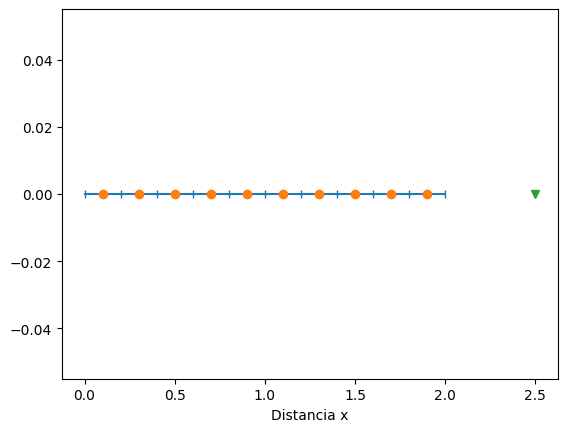

In [4]:
#Gráfica de geometría:

plt.plot(x,y,marker = '|')
plt.plot(xp[0:10],yp[0:10],'o')
plt.plot(xx,yy,marker = 'v')

plt.xlabel('Distancia x')

plt.show()

El sistema que se va a hacer es:

\begin{equation}
  \begin{bmatrix}
    t_{22}(x_1,ξ_1) & t_{22}(x_1,ξ_2) & ⋯ & t_{22}(x_1,ξ_{10}) \\
    t_{22}(x_2,ξ_1) & t_{22}(x_2,ξ_2) & ⋯ & t_{22}(x_2,ξ_{10}) \\
    \vdots & \vdots & \vdots & \vdots \\
    t_{22}(x_{10},ξ_1) & t_{22}(x_{10},ξ_2) & ⋯ & t_{22}(x_{10},ξ_{10})
  \end{bmatrix}
  \begin{bmatrix}
    ϕ_2(\xi_1) \\
    ϕ_2(\xi_2) \\
    \vdots \\
    ϕ_2(\xi_{10})
  \end{bmatrix}
  =
  \begin{bmatrix}
    -t_2^{(0)}(x_1) \\
    -t_2^{(0)}(x_2) \\
    \vdots \\
    -t_2^{(0)}(x_{10})
  \end{bmatrix}
\end{equation}

Cada $t_{22}$ se construye como:

\begin{equation}
  \int_{ξ-\frac{(x_2-x_1)}{2}}^{ξ+\frac{(x_2-x_1)}{2}} T_{22}(x,\xi)dS_ξ
\end{equation}

siendo $T_{22}$:

\begin{equation}
  T_{22}=\frac{i}{4r}D(kr) γ_k η_k
\end{equation}

In [9]:
#Funciones para calcular Integral:
def D(k,r):
  return k*r*scis.hankel2(1,k*r)

def Gamma(ix,ixi,r):
  return (ix-ixi)/r

def Eta(A,B):
  AB = B - A
  normal = np.array([AB[1], -AB[0]])
  normal = normal / la.norm(normal)
  return normal

def Integral(t2,ix,ixi):
  #Límite superior:
  a=ixi+((ixi-ix)/2)
  #Límite inferior:
  b=ixi-((ixi-ix)/2)
  fixed_quad(t2, a, b, n=5)

def Int_T22(ix,ixi,k,A,B):
  r=la.norm(ix-ixi)
  t2=(1j/(4*r))*D(k,r)*Gamma(ix,ixi,r)*Eta(A,B)
  resultado=Integral(t2,ix,ixi)
  return resultado

In [21]:
#Construcción de matriz de tracciones:

#Variable auxiliar t22:
t22=np.zeros((10,10))

for renglon in range(10):
  for columna in range(10):
    #Si se encuentra en la diagonal
    if renglon==columna:
      t22[renglon][columna]=0.5
    else:
      #Puntos centrales
      ix=xp[renglon]
      ixi=xp[columna]
      #Para vector normal:
      A=np.array([x[renglon],y[renglon]])
      B=np.array([x[renglon+1],y[renglon+1]])
      #t22[renglon][columna]=Int_T22(ix,ixi,k,A,B)

print(t22)

[[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]]
